<a href="https://colab.research.google.com/github/dmousav1/JHU-Neural-Networks/blob/main/classification_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Networks Final Project
Daniel Mousavi, Christian Kocsis, Michael Felice, Tom Dignan

605.647.8VL.FA24
Dr. Mark Fleischer


What follows is a modified version of Daniel Mousavi's project 7 submission with changes to accept arbitrary weights or generate random weights.

In [ ]:
import numpy as np
class Perceptron:
    def __init__(self, weights, desired_output, bias, eta):
        self.weights = np.array(weights)
        self.bias = bias
        self.desired_output = desired_output
        self.eta = eta
        self.activity = 0.0
        self.activation = 0.0
        self.delta = 0.0

    # Calculate activity
    def calc_activity(self, input):
        input = np.array(input)
        self.activity = self.bias + np.dot(self.weights, input)

    # Calculate activation with sigmoid function
    def calc_activation(self):
        self.activation = 1 / (1 + np.exp(-self.activity))

    # Calculate delta/error
    def set_delta(self, error):
        activation_derivative = self.activation * (1 - self.activation)
        self.delta = error * activation_derivative

    # Update weights of each perceptron
    def update_weights(self, inputs):
        self.weights -= self.eta * self.delta * np.array(inputs)
        self.bias -= self.eta * self.delta

In [ ]:
import random

class Network:
    def __init__(self, input_size=2, hidden_size=2, output_size=1, eta=1.0,
                 use_random_weights=False, use_provided_weights=False,
                 initial_hidden_weights=None,
                 initial_output_weights=None):

        self.eta = eta

        # optionally use random weights
        if use_random_weights:
          # Hidden layer perceptrons
          self.initial_hidden_weights = [random.random() for _ in range(input_size)]
          self.hidden_layer = [Perceptron(weights=self.initial_hidden_weights, desired_output=0, bias=0, eta=eta)
                              for _ in range(hidden_size)]

          # Output layer perceptrons
          self.initial_output_weights = [random.random() for _ in range(hidden_size)]
          self.output_layer = [Perceptron(weights=self.initial_output_weights, desired_output=0.7, bias=0, eta=eta)]

        # optionally provide weights (supports re-using the best ones we found)
        elif use_provided_weights:
          self.initial_hidden_weights = initial_hidden_weights
          self.hidden_layer = [Perceptron(weights=self.initial_hidden_weights, desired_output=0, bias=0, eta=eta)
                              for _ in range(hidden_size)]

          # Output layer perceptrons
          self.initial_output_weights = initial_output_weights
          self.output_layer = [Perceptron(weights=self.initial_output_weights, desired_output=0.7, bias=0, eta=eta)]

        else:
          # Hidden layer perceptrons
          self.hidden_layer = [Perceptron(weights=[0.3] * input_size, desired_output=0, bias=0, eta=eta)
                              for _ in range(hidden_size)]

          # Output layer perceptrons
          self.output_layer = [Perceptron(weights=[0.8] * hidden_size, desired_output=0.7, bias=0, eta=eta)]

    # Feed-Forward
    def forward(self, inputs):
        # Hidden layer feed forward
        hidden_activations = []
        for perceptron in self.hidden_layer:
            perceptron.calc_activity(inputs)
            perceptron.calc_activation()
            hidden_activations.append(perceptron.activation)

        # Output layer feed forward
        for perceptron in self.output_layer:
            perceptron.calc_activity(hidden_activations)
            perceptron.calc_activation()

        return hidden_activations, self.output_layer[0].activation

    def ffbp(self, inputs, desired_output):
        # Feed Forward
        hidden_activations, output_activation = self.forward(inputs)

        # Get output layer error and delta
        output_error = output_activation - desired_output
        self.output_layer[0].set_delta(output_error)

        # Back propagate to hidden layer
        for i, hidden_neuron in enumerate(self.hidden_layer):
            hidden_error = self.output_layer[0].weights[i] * self.output_layer[0].delta
            hidden_neuron.set_delta(hidden_error)

        # Update weights for output layer
        self.output_layer[0].update_weights(hidden_activations)

        # Update weights for hidden layer
        for i, hidden_neuron in enumerate(self.hidden_layer):
            hidden_neuron.update_weights(inputs)

    # Train Network for certain number of epochs
    def train(self, inputs, desired_output, epochs):
        for _ in range(epochs):
            for i in range(len(inputs)):
                self.ffbp(inputs[i], desired_output[i])

    # Plug in an input to the trained network
    def predict(self, inputs):
        _, output_activation = self.forward(inputs)
        return output_activation

    # Get error
    def getBigE(self, inputs, desired_output):
        output_activation = self.predict(inputs)
        small_e = desired_output - output_activation
        bigE = 0.50 * small_e ** 2
        return bigE

    # Get weights
    def getWeights(self):
        weights_info = {}

        # Get weights and biases from hidden layer perceptrons
        for i, perceptron in enumerate(self.hidden_layer):
            weights_info[f"Hidden Layer Perceptron {i + 1}"] = {
                "weights": perceptron.weights,
                "bias": perceptron.bias
            }

        # Collect weights and biases from output layer perceptron
        for i, perceptron in enumerate(self.output_layer):
            weights_info["Output Layer Perceptron"] = {
                "weights": perceptron.weights,
                "bias": perceptron.bias
            }
        return weights_info

The following is our application of the above neural network to solve the advertising campaign problem posed in the final project.

In [ ]:
# Define data for final project
ITEM, LAC, SOW, TACA = range(4)
data = [
  None,  # placeholder to avoid index confusion
  [1, 0.90, 0.87, 1],
  [2, 1.81, 1.02, 0],
  [3, 1.31, 0.75, 1],
  [4, 2.36, 1.60, 0],
  [5, 2.48, 1.14, 0],
  [6, 2.17, 2.08, 1],
  [7, 0.41, 1.87, 0],
  [8, 2.85, 2.91, 1],
  [9, 2.45, 0.52, 0],
  [10, 1.05, 1.93, 0],
  [11, 2.54, 2.97, 1],
  [12, 2.32, 1.73, 0],
  [13, 0.07, 0.09, 1],
  [14, 1.86, 1.31, 0],
  [15, 1.32, 1.96, 0],
  [16, 1.45, 2.19, 0],
  [17, 0.94, 0.34, 1],
  [18, 0.28, 0.71, 1],
  [19, 1.75, 2.21, 0],
  [20, 2.49, 1.52, 0]
]
# define training set (odd numbered data points)
training_set = set(i for i in range(1, 20, 2))
test_set = set(i for i in range(2, 21, 2))

print(f"The training data consists of (odd) items: {training_set}")
print(f"The test data consists of (even) items: {test_set}")

The training data consists of (odd) items: {1, 3, 5, 7, 9, 11, 13, 15, 17, 19}
The test data consists of (even) items: {2, 4, 6, 8, 10, 12, 14, 16, 18, 20}


In [ ]:
# train on the final project data


# we want to find the best possible initial random weights,
# let's try training 100 times and see what they might be
# train for 30 cycles; we want to minimize big E

best_big_E = 1
best_hidden_initial_weights = None
best_output_initial_weights = None

# we'll repeat the training procedure a few times to find the best initial
# weights
for i in range(100):
  # to try new random initial weights, re-initialize the neural network
  net = Network(input_size=2, hidden_size=2, output_size=1, eta=1.0, use_random_weights=True)

  avg_E_procedure = 0

  for cycle in range(30):
      avg_E_cycle = 0

      for i in training_set:
        net.ffbp(data[i][LAC:TACA], data[i][TACA])
        avg_E_cycle += net.getBigE(data[i][LAC:TACA], data[i][TACA])
      avg_E_cycle /= len(training_set)


  # uncomment to just show the big E for this 30-cycle training procedure
  # (with 1000 random iterations, it will take too long)
  # print(f"avg_E#{i}={avg_E_cycle}")

  # use the average of big E over the training set to judge how good our weights
  # were (this will be nonzero, the value from the last iteration of the training
  # loop above -- python's scope is funny -- i'll add an assert to prove that)
  assert avg_E_cycle > 0
  if avg_E_cycle < best_big_E:
      best_big_E = avg_E_cycle
      best_hidden_initial_weights = net.initial_hidden_weights
      best_output_initial_weights = net.initial_output_weights

print(f"The best big E we could get was: {best_big_E}")
print(f"Best hidden *initial* weights after 100 random attempts: {best_hidden_initial_weights}")
print(f"Best output *initial* weights after 100 random attempts: {best_output_initial_weights}")

The best big E we could get was: 0.08072081276437178
Best hidden *initial* weights after 100 random attempts: [0.23834581150636847, 0.4138921114518007]
Best output *initial* weights after 100 random attempts: [0.9179390831844065, 0.008301217689612006]


In [ ]:
# now that we have found the "best" initial weights by retraining 100 times
# with random ones, train again using them
net = Network(input_size=2, hidden_size=2, output_size=1, eta=1.0,
              use_provided_weights=True,
              initial_hidden_weights=best_hidden_initial_weights,
              initial_output_weights=best_output_initial_weights)

for cycle in range(30):
  avg_E_cycle = 0

  for i in training_set:
    net.ffbp(data[i][LAC:TACA], data[i][TACA])
    avg_E_cycle += net.getBigE(data[i][LAC:TACA], data[i][TACA])
  avg_E_cycle /= len(training_set)

  # show we're minimizing E
  print(f"avg_E_cycle#{cycle}={avg_E_cycle}")


# uncomment to just show the big E for this 30-cycle training procedure

avg_E_cycle#0=0.11491123915794813
avg_E_cycle#1=0.1084889516572497
avg_E_cycle#2=0.1083466419444294
avg_E_cycle#3=0.1083620823034361
avg_E_cycle#4=0.10818919409499314
avg_E_cycle#5=0.1078989720584204
avg_E_cycle#6=0.10750841746028508
avg_E_cycle#7=0.10700401031814928
avg_E_cycle#8=0.10637415510541115
avg_E_cycle#9=0.10562060964831366
avg_E_cycle#10=0.10475592112760672
avg_E_cycle#11=0.10379667133314621
avg_E_cycle#12=0.10275856459597535
avg_E_cycle#13=0.10165452567496758
avg_E_cycle#14=0.10049469547464818
avg_E_cycle#15=0.09928712229784274
avg_E_cycle#16=0.09803850363466751
avg_E_cycle#17=0.0967547684197288
avg_E_cycle#18=0.09544148874132821
avg_E_cycle#19=0.0941041621733984
avg_E_cycle#20=0.09274839893087651
avg_E_cycle#21=0.09138002982889426
avg_E_cycle#22=0.09000513964998708
avg_E_cycle#23=0.08863002869996314
avg_E_cycle#24=0.08726110995049302
avg_E_cycle#25=0.08590475611505169
avg_E_cycle#26=0.08456711702532767
avg_E_cycle#27=0.08325393078121436
avg_E_cycle#28=0.08197035154649181
a

In [ ]:

# create an optimized threshold function for the sigmoid activation function
#
# to do this we need to consider reciever operating characteristics; we'll repeat
# work on our training data once again

# we could observe the data and pick 0.7, but this is an automated solution


# find an optimal threshold by calculating the ROC curve
i = 0
step = 0.01

# generate data to plot the ROC curve
THRESHOLD, TPR, FPR = range(3)
roc = [] # this is the data you can plot!!!
max_tpr = 0
min_fpr = 0
best_threshold = 0

for i in range(100):
  threshold = i * step
  nr_correct = 0
  tp = fp = fn = tn = 1e-6

  for j in training_set:
    activation = net.predict(data[j][LAC:TACA])

    if activation >= threshold and data[j][TACA] == 1:
      tp += 1
    elif activation < threshold and data[j][TACA] == 1:
      fp += 1
    elif activation < threshold and data[j][TACA] == 0:
      tn += 1
    elif activation >= threshold and data[j][TACA] == 0:
      fn += 1

  tpr = tp / (tp + fn)
  fpr = fp / (fp + tn)

  roc.append([threshold, tpr, fpr])

  # for now, just maximize tpr to choose threshold
  if tpr > max_tpr:
    max_tpr = tpr
    best_threshold = threshold

  i+=1


# optimized threshold function
threshold_fn = lambda x: x >= best_threshold

# show the roc data
roc

[[0.0, 0.5, 0.5],
 [0.01, 0.5, 0.5],
 [0.02, 0.5, 0.5],
 [0.03, 0.5, 0.5],
 [0.04, 0.5, 0.5],
 [0.05, 0.5, 0.5],
 [0.06, 0.5, 0.5],
 [0.07, 0.5, 0.5],
 [0.08, 0.5, 0.5],
 [0.09, 0.5, 0.5],
 [0.1, 0.5, 0.5],
 [0.11, 0.5, 0.5],
 [0.12, 0.5, 0.5],
 [0.13, 0.5, 0.5],
 [0.14, 0.5, 0.5],
 [0.15, 0.5, 0.5],
 [0.16, 0.5, 0.5],
 [0.17, 0.5, 0.5],
 [0.18, 0.5, 0.5],
 [0.19, 0.5, 0.5],
 [0.2, 0.5, 0.5],
 [0.21, 0.5, 0.5],
 [0.22, 0.5, 0.5],
 [0.23, 0.5, 0.5],
 [0.24, 0.5, 0.5],
 [0.25, 0.5, 0.5],
 [0.26, 0.5, 0.5],
 [0.27, 0.5, 0.5],
 [0.28, 0.5, 0.5],
 [0.29, 0.44444445679012073, 0.999999000002],
 [0.3, 0.44444445679012073, 0.999999000002],
 [0.31, 0.5, 0.5],
 [0.32, 0.5, 0.5],
 [0.33, 0.5, 0.5],
 [0.34, 0.6666666111111296, 0.25000012499993746],
 [0.35000000000000003, 0.6666666111111296, 0.25000012499993746],
 [0.36, 0.6666666111111296, 0.25000012499993746],
 [0.37, 0.6666666111111296, 0.25000012499993746],
 [0.38, 0.6666666111111296, 0.25000012499993746],
 [0.39, 0.6666666111111296, 0.250000124

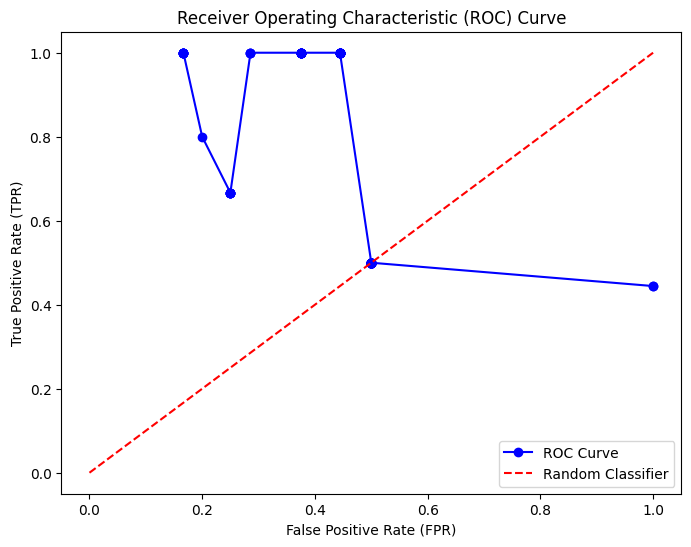

In [ ]:
# plotting the roc curve
# manually added the roc data as the code chunks above would not run - roc is not defined

import matplotlib.pyplot as plt

# sort the data by FPR (index 2) and then by TPR (index 1)
roc.sort(key=lambda x: (x[2], x[1]))

# extract TPR, FPR, and Thresholds for plotting
thresholds = [row[0] for row in roc]
tpr = [row[1] for row in roc]
fpr = [row[2] for row in roc]

# ensure FPR is sorted and interpolate missing points for smoothness
fpr = np.array(fpr)
tpr = np.array(tpr)

# plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', label="ROC Curve", color='blue')
#plt.plot(tpr, )
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(False)
plt.show()


In [ ]:
# test network and find confusion matrix
tp = fp = tn = fn = 0
print(f"using threshold: {best_threshold}")
print(len(test_set))
for j in test_set:
  activation = net.predict(data[j][LAC:TACA])

  if threshold_fn(activation) and data[j][TACA] == 1:
    tp += 1
  elif not threshold_fn(activation) and data[j][TACA] == 1:
    fp += 1
  elif threshold_fn(activation) and data[j][TACA] == 0:
    fn += 1
  elif not threshold_fn(activation) and data[j][TACA] == 0:
    tn += 1


print ("Confusion Matrix: ")
print(f"{tp}, {fp}")
print(f"{fn}, {tn}")




using threshold: 0.41000000000000003
10
Confusion Matrix: 
1, 2
0, 7


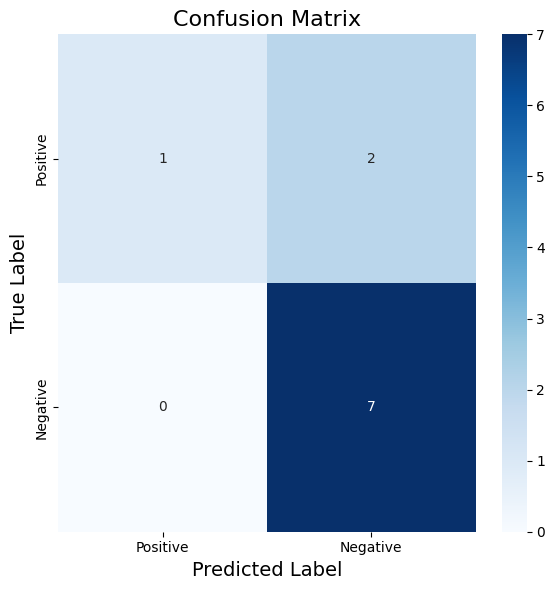

In [ ]:
# plotting the confusion matrix

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# create the confusion matrix
confusion_matrix = np.array([[tp, fp],
                             [fn, tn]])

# define the class labels
labels = ["Positive", "Negative"]

# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# add titles and labels
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

# show the plot
plt.tight_layout()
plt.show()

In [ ]:
# statistical analysis of neural network

from math import sqrt
from scipy.stats import sem, norm, ttest_1samp, binomtest

# total number of samples
n = tp + fp + fn + tn

# basic metrics
accuracy = (tp + tn) / n
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# advanced metrics
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # true negative rate
balanced_accuracy = (recall + specificity) / 2
prevalence = (tp + fn) / n
negative_predictive_value = tn / (tn + fn) if (tn + fn) > 0 else 0
false_discovery_rate = fp / (tp + fp) if (tp + fp) > 0 else 0
false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
false_negative_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
g_mean = sqrt(recall * specificity) if recall > 0 and specificity > 0 else 0

# matthews correlation coefficient (mcc)
mcc = ((tp * tn) - (fp * fn)) / sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# cohen's kappa
observed_accuracy = accuracy
expected_accuracy = ((tp + fp) * (tp + fn) + (tn + fn) * (tn + fp)) / (n * n)
kappa = (observed_accuracy - expected_accuracy) / (1 - expected_accuracy) if (1 - expected_accuracy) > 0 else 0

# confidence intervals
accuracy_sem = sem([1] * (tp + tn) + [0] * (fp + fn))  # standard error
conf_interval_accuracy = norm.interval(0.95, loc=accuracy, scale=accuracy_sem)

# statistical significance testing
# null hypothesis: random classifier with accuracy = 0.5
p_value_accuracy = ttest_1samp([1 if i < (tp + tn) else 0 for i in range(n)], 0.5).pvalue

# binomial test for true positive rate
# null hypothesis: random guesses for positive class
binom_test_result = binomtest(tp, tp + fn, 0.5, alternative='greater')

# print metrics
print("### basic metrics ###")
print(f"accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall (sensitivity): {recall:.2f}")
print(f"f1-score: {f1:.2f}")

print("\n### advanced metrics ###")
print(f"specificity (true negative rate): {specificity:.2f}")
print(f"balanced accuracy: {balanced_accuracy:.2f}")
print(f"g-mean: {g_mean:.2f}")
print(f"prevalence: {prevalence:.2f}")
print(f"negative predictive value (npv): {negative_predictive_value:.2f}")
print(f"false discovery rate (fdr): {false_discovery_rate:.2f}")
print(f"false positive rate (fpr): {false_positive_rate:.2f}")
print(f"false negative rate (fnr): {false_negative_rate:.2f}")
print(f"matthews correlation coefficient (mcc): {mcc:.2f}")
print(f"cohen's kappa: {kappa:.2f}")

print("\n### confidence intervals ###")
print(f"accuracy (95% ci): {conf_interval_accuracy[0]:.2f} to {conf_interval_accuracy[1]:.2f}")

print("\n### statistical significance testing ###")
print(f"p-value for accuracy vs. random classifier (null hypothesis: accuracy = 0.5): {p_value_accuracy:.4f}")
print(f"p-value for true positive rate vs. random guessing: {binom_test_result.pvalue:.4f}")

### basic metrics ###
accuracy: 0.80
precision: 0.33
recall (sensitivity): 1.00
f1-score: 0.50

### advanced metrics ###
specificity (true negative rate): 0.78
balanced accuracy: 0.89
g-mean: 0.88
prevalence: 0.10
negative predictive value (npv): 1.00
false discovery rate (fdr): 0.67
false positive rate (fpr): 0.22
false negative rate (fnr): 0.00
matthews correlation coefficient (mcc): 0.51
cohen's kappa: 0.41

### confidence intervals ###
accuracy (95% ci): 0.54 to 1.06

### statistical significance testing ###
p-value for accuracy vs. random classifier (null hypothesis: accuracy = 0.5): 0.0510
p-value for true positive rate vs. random guessing: 0.5000


In [ ]:
# make a table of the metrics and stats

import pandas as pd
from tabulate import tabulate

# metrics and statistical results
metrics = {
    "Metric": [
        "Accuracy", "Precision", "Recall (Sensitivity)", "F1-Score",
        "Specificity (True Negative Rate)", "Balanced Accuracy", "G-Mean",
        "Prevalence", "Negative Predictive Value (NPV)", "False Discovery Rate (FDR)",
        "False Positive Rate (FPR)", "False Negative Rate (FNR)",
        "Matthews Correlation Coefficient (MCC)", "Cohen's Kappa",
        "Accuracy (95% CI)", "P-Value (Accuracy vs Random Classifier)",
        "P-Value (True Positive Rate vs Random Guessing)"
    ],
    "Value": [
        round(accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4),
        round(specificity, 4), round(balanced_accuracy, 4), round(g_mean, 4),
        round(prevalence, 4), round(negative_predictive_value, 4), round(false_discovery_rate, 4),
        round(false_positive_rate, 4), round(false_negative_rate, 4), round(mcc, 4), round(kappa, 4),
        str(round(conf_interval_accuracy[0], 4)) + " to " + str(round(conf_interval_accuracy[1], 4)),
        round(p_value_accuracy, 4), round(float(binom_test_result.pvalue), 4)
    ]
}

# create a pandas DataFrame
df_metrics = pd.DataFrame(metrics)

# print the table using tabulate for a clean output
print(tabulate(df_metrics, headers="keys", tablefmt="fancy_grid", showindex=False))

╒═════════════════════════════════════════════════╤══════════════════╕
│ Metric                                          │ Value            │
╞═════════════════════════════════════════════════╪══════════════════╡
│ Accuracy                                        │ 0.8              │
├─────────────────────────────────────────────────┼──────────────────┤
│ Precision                                       │ 0.3333           │
├─────────────────────────────────────────────────┼──────────────────┤
│ Recall (Sensitivity)                            │ 1.0              │
├─────────────────────────────────────────────────┼──────────────────┤
│ F1-Score                                        │ 0.5              │
├─────────────────────────────────────────────────┼──────────────────┤
│ Specificity (True Negative Rate)                │ 0.7778           │
├─────────────────────────────────────────────────┼──────────────────┤
│ Balanced Accuracy                               │ 0.8889           │
├─────

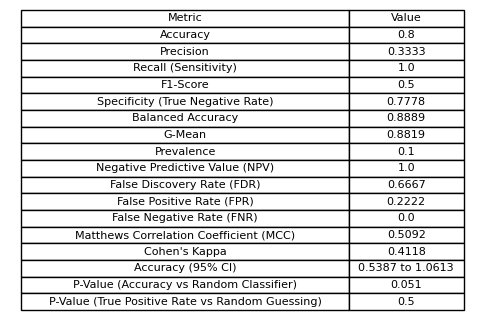

In [ ]:
# plot the metric and stats table for use in the appendix

import matplotlib.pyplot as plt

# plot the table using Matplotlib
fig, ax = plt.subplots(figsize=(6, 2))  # adjust figure size as needed
ax.axis('tight')
ax.axis('off')

# create the table
table = ax.table(cellText=df_metrics.values, colLabels=df_metrics.columns, cellLoc='center', loc='center')

# style the table
table.auto_set_font_size(False)
table.set_fontsize(8)
table.auto_set_column_width(col=list(range(len(df_metrics.columns))))

# plot the table
plt.show()

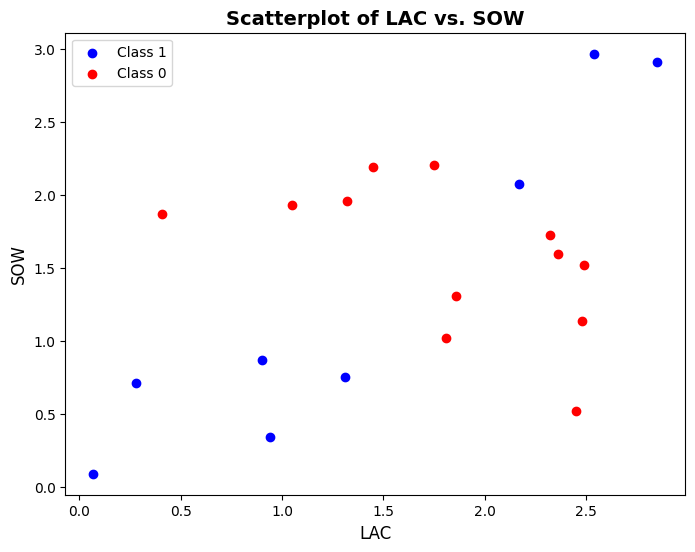

In [ ]:
# 2d scatterplot of SOW and LAC
# color TACA 0==red && 1==blue

import matplotlib.pyplot as plt

# define data for final project
ITEM, LAC, SOW, TACA = range(4)
data = [
    None,  # placeholder to avoid index confusion
    [1, 0.90, 0.87, 1],
    [2, 1.81, 1.02, 0],
    [3, 1.31, 0.75, 1],
    [4, 2.36, 1.60, 0],
    [5, 2.48, 1.14, 0],
    [6, 2.17, 2.08, 1],
    [7, 0.41, 1.87, 0],
    [8, 2.85, 2.91, 1],
    [9, 2.45, 0.52, 0],
    [10, 1.05, 1.93, 0],
    [11, 2.54, 2.97, 1],
    [12, 2.32, 1.73, 0],
    [13, 0.07, 0.09, 1],
    [14, 1.86, 1.31, 0],
    [15, 1.32, 1.96, 0],
    [16, 1.45, 2.19, 0],
    [17, 0.94, 0.34, 1],
    [18, 0.28, 0.71, 1],
    [19, 1.75, 2.21, 0],
    [20, 2.49, 1.52, 0]
]

# extract LAC, SOW, and TACA values
lac = [row[LAC] for row in data if row is not None]
sow = [row[SOW] for row in data if row is not None]
taca = [row[TACA] for row in data if row is not None]

# create the scatterplot
plt.figure(figsize=(8, 6))

# plot points with different colors based on TACA values
for x, y, label in zip(lac, sow, taca):
    color = 'blue' if label == 1 else 'red'
    plt.scatter(x, y, color=color, label=f'Class {label}' if f'Class {label}' not in plt.gca().get_legend_handles_labels()[1] else '')

# add labels, title, and legend
plt.xlabel('LAC', fontsize=12)
plt.ylabel('SOW', fontsize=12)
plt.title('Scatterplot of LAC vs. SOW', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(False)

# show the plot
plt.show()